To do
- Look into saving/loading data using Parquet
- ~~Add column for track/shower expectation~~
- Write code to drop certain columns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import column_renamer, pdgid_converter, is_shower, count_occurrences

In [3]:
filenames = ["neutrino11x.h5", "neutrino12x.h5", "neutrino13x.h5"]
filepaths = [os.path.join("data", filename) for filename in filenames]

df_list = []
for filepath in filepaths:
    df_list.append(pd.read_hdf(filepath))
dataframe = pd.concat(df_list)

dataframe.rename(column_renamer, axis="columns", inplace=True)
dataframe["Particle name"] = dataframe.apply(lambda row: pdgid_converter(row["pdgid"]), axis=1)
dataframe["Is shower?"] = dataframe.apply(is_shower, axis=1)

dataframe

KeyboardInterrupt: 

In [5]:
filepath = r"data/newselection.csv"

dataframe = pd.read_csv(filepath)
dataframe.rename(column_renamer, axis="columns", inplace=True)
dataframe["Particle name"] = dataframe.apply(lambda row: pdgid_converter(row["pdgid"]), axis=1)

dataframe

,Run number,index,E.run_id,exposure,weight,weight_rate,Angle between direction of shower and track,"closest[:,0,0]","closest[:,0,1]","closest[:,1,0]",...,T.sum_jppmuon.n_within_1deg,T.sum_trig_hits.nhits,"E.trks.rec_type[:,0]","E.trks.rec_type[:,1]",Inelasticity,pdgid,is_cc,energy,is_neutrino,Particle name
0,0,0,12000,6625514.5,3.730160e-04,5.629993e-11,75.145741,62.840773,7.032061e+01,3.789595e+01,...,1,18,4000,4000,0.290779,-12,1.0,177.187285,1.0,Anti electron neutrino
1,1,1,12000,6625514.5,3.847163e-04,5.806588e-11,81.951547,41.272965,4.768306e+01,4.712456e+01,...,1,15,4000,4000,0.588767,-12,1.0,323.063074,1.0,Anti electron neutrino
2,2,2,12000,6625514.5,5.896767e-04,8.900090e-11,90.000000,29.085620,2.900304e+01,1.000000e+20,...,1,140,4000,0,0.050258,-12,1.0,125.963081,1.0,Anti electron neutrino
3,3,3,12000,6625514.5,1.125916e-03,1.699365e-10,90.000000,17.880590,2.446714e+01,1.000000e+20,...,1,28,4000,0,0.325333,-12,1.0,279.959710,1.0,Anti electron neutrino
4,4,4,12000,6625514.5,2.045558e-03,3.087395e-10,42.081193,33.322709,4.458252e+01,1.783924e+01,...,1,65,4000,4000,0.945951,-12,1.0,160.574914,1.0,Anti electron neutrino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145951,1145951,145951,12999,6625514.5,2.851741e-07,4.304181e-14,94.172571,44.409249,1.000000e+20,2.854383e+01,...,1,28,4000,4000,0.061526,16,1.0,2448.162096,1.0,Tau neutrino
1145952,1145952,145952,12999,6625514.5,6.330232e-06,9.554325e-13,13.455761,36.485096,4.134148e+01,1.206134e+01,...,1,372,4000,4000,0.328807,16,1.0,613.956703,1.0,Tau neutrino
1145953,1145953,145953,12999,6625514.5,1.814828e-06,2.739150e-13,61.076028,25.459556,4.071953e+01,5.181339e+01,...,2,9,4000,4000,0.560040,16,1.0,1165.439426,1.0,Tau neutrino
1145954,1145954,145954,12999,6625514.5,4.911171e-07,7.412512e-14,8.214167,37.261636,3.721765e+01,1.508203e+01,...,1,389,4000,4000,0.848183,16,1.0,1205.088885,1.0,Tau neutrino


In [5]:
for index, value in dataframe["pdgid"].value_counts().items():
    print((pdgid_converter(index) + ":").ljust(20), value, sep="\t")

Muon neutrino:      	523653
Anti muon neutrino: 	269731
Electron neutrino:  	176889
Anti electron neutrino:	112556
Tau neutrino:       	33390
Anti tau neutrino:  	29737


In [11]:
count_occurrences(dataframe, "pdgid")

   pdgid  Occurrences
0    -16        46912
1    -14       426087
2    -12       177088
3     12       278601
4     14       826923
5     16        52816


In [7]:
for index, value in dataframe["Is shower?"].value_counts().items():
    print(index, value)

True 1024415
False 784012


In [3]:
count_series = dataframe.groupby(["pdgid", "is_cc"]).size()
count_series

pdgid  is_cc
-16    1.0       46912
-14    0.0      194984
       1.0      231103
-12    1.0      177088
 12    1.0      278601
 14    0.0      274014
       1.0      552909
 16    1.0       52816
dtype: int64

In [9]:
def count_occurrences(dataframe, columns):
    count_series = dataframe.groupby(columns).size()
    new_df = count_series.to_frame(name="Occurrences").reset_index()
    print(new_df)

In [10]:
count_occurrences(dataframe, "pdgid")

   pdgid  Occurrences
0    -16        46912
1    -14       426087
2    -12       177088
3     12       278601
4     14       826923
5     16        52816


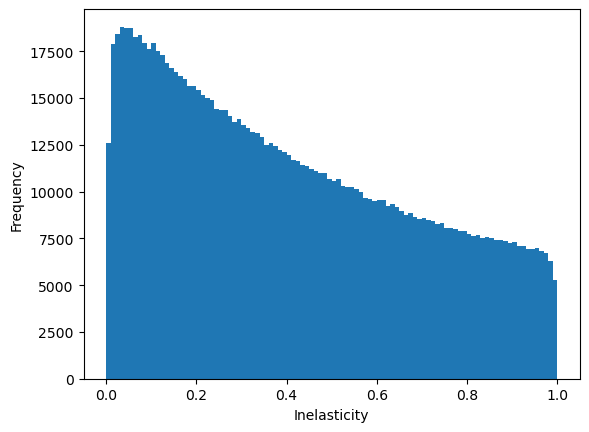

In [6]:
dataframe['Inelasticity'].plot.hist(bins=100, xlabel='Inelasticity')
plt.show()

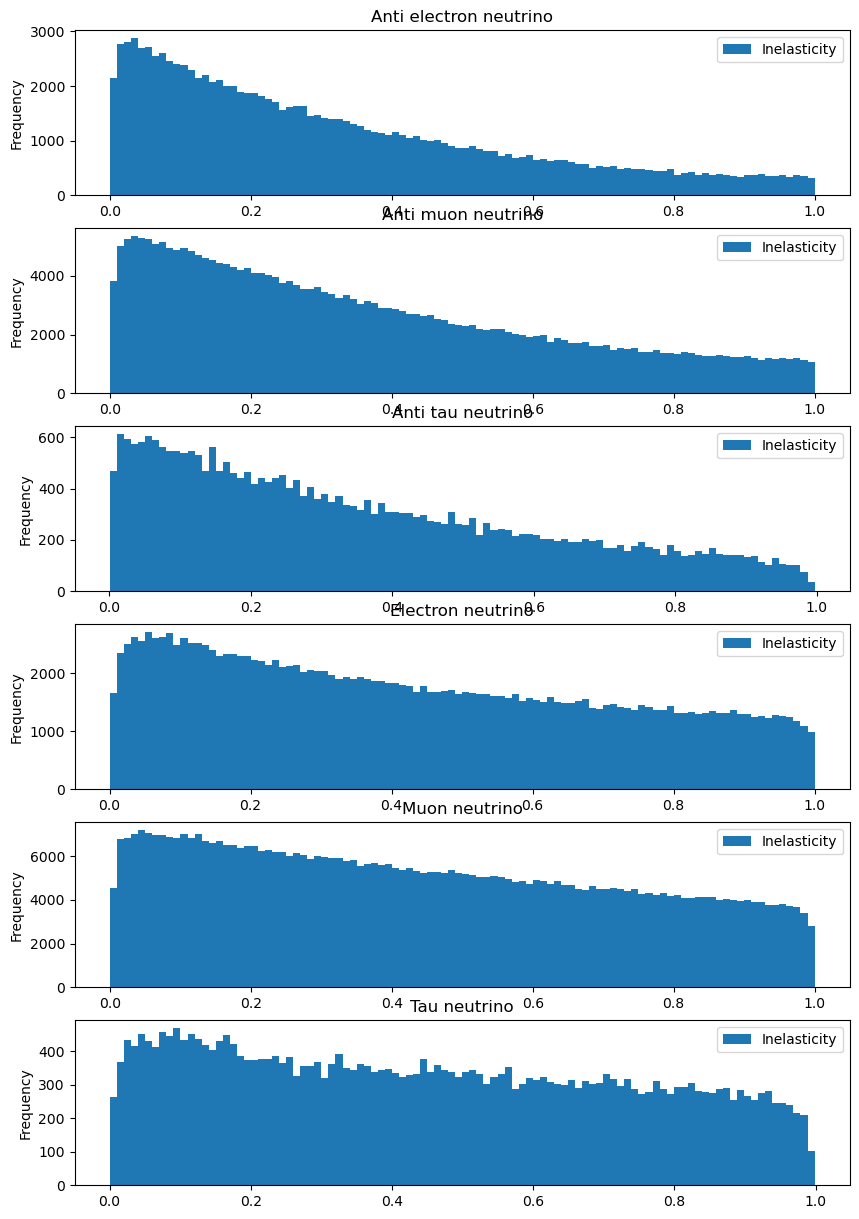

In [10]:
dataframe[['Inelasticity','Particle name']].plot.hist(by='Particle name',bins=100,figsize=(10, 15))
pass
#plt.show()